# Census Income Project

### Problem Statement:- Build a machine learning model to determine whether a person makes over $50K a year.

Importing the important libraries for data reading and cleaning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the data using the url path.

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'

In [3]:
df=pd.read_csv(url)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Our data is loaded.

It has 32560 rows and columns.

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Data has 6 numerical and 9 categorical features.

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Name of all the features in the dataset.

Let's have a look at each feature.

In [8]:
df.Age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

In [9]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df.Fnlwgt.value_counts()

123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [11]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [12]:
df.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [13]:
df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [14]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [16]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [17]:
df.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [18]:
df.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [19]:
df.Capital_loss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [20]:
df.Hours_per_week.value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64

In [21]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [22]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

We have observe few '?' values in the dataset. We will replace this with the null values.

In [23]:
df.replace(' ?',np.NaN,inplace=True)

In [24]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

As all the NaN values are in categorical value, we will use the mode method to replace the missing value.

In [25]:
for i in ['Workclass','Occupation','Native_country']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [26]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The null value has been successfully removed.

In [27]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. Age range is between 17 to 90 years.
2. People work between 1 hours per week to 99 hours.

### Visulaization

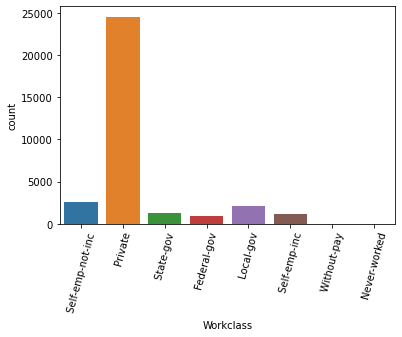

In [28]:
sns.countplot(df['Workclass'])
plt.xticks(rotation=75)
plt.show()

Most of the people work in private sector. There is no one who is Without-pay and Never-worked

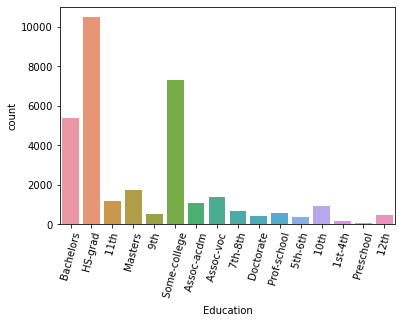

In [29]:
sns.countplot(df['Education'])
plt.xticks(rotation=75)
plt.show()

The data shows that most of the people has HS-grad degree followed by college. Bacehlors degree form the third highest group.

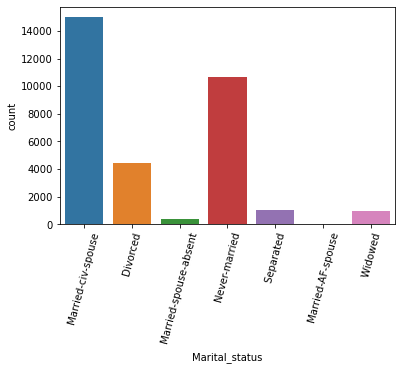

In [30]:
sns.countplot(df['Marital_status'])
plt.xticks(rotation=75)
plt.show()

The data includes mostly married people.

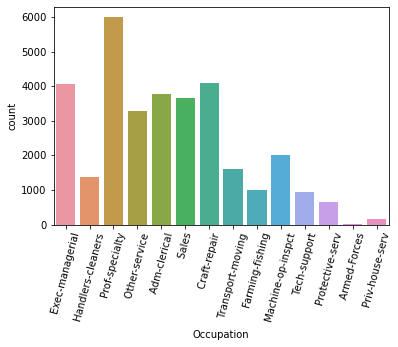

In [31]:
sns.countplot(df['Occupation'])
plt.xticks(rotation=75)
plt.show()

Most people belongs to Prof speciality followed by Exec Managerial occupation.

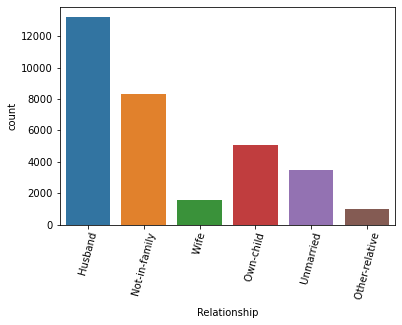

In [32]:
sns.countplot(df['Relationship'])
plt.xticks(rotation=75)
plt.show()

Husband is the dominant relationship in the data.

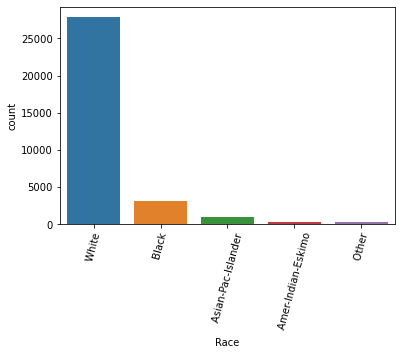

In [33]:
sns.countplot(df['Race'])
plt.xticks(rotation=75)
plt.show()

the census data includes most of the white people.

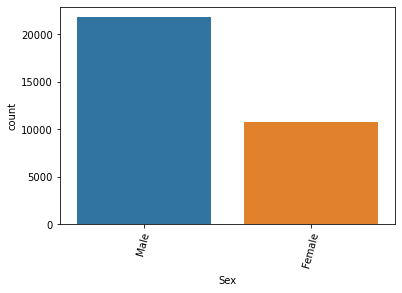

In [34]:
sns.countplot(df['Sex'])
plt.xticks(rotation=75)
plt.show()

There are more male people in the census report

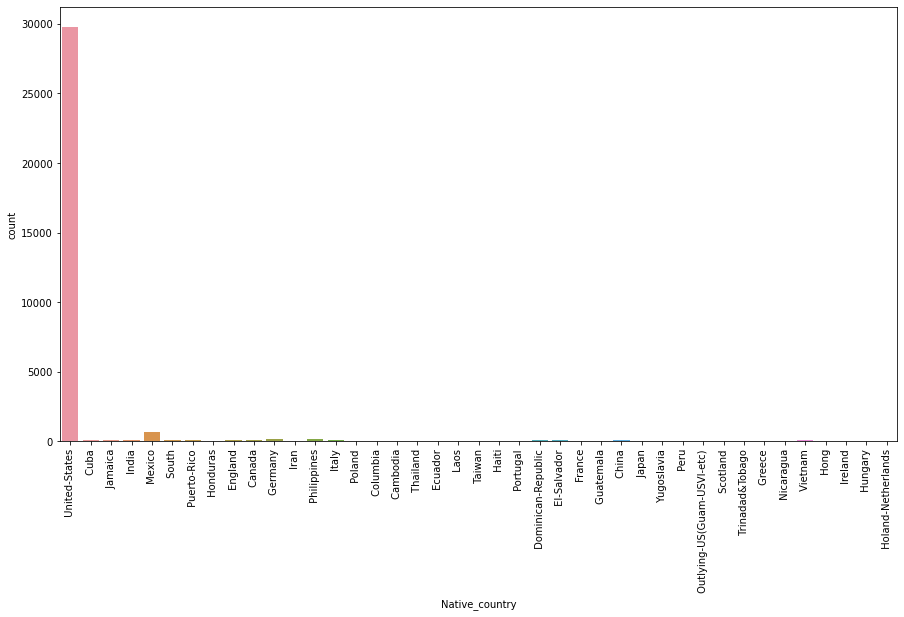

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

The census consists majority of the data from United States.

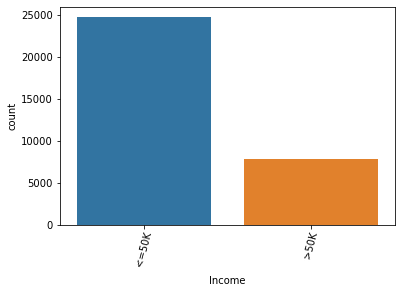

In [36]:
sns.countplot(df['Income'])
plt.xticks(rotation=75)
plt.show()

Income is our target variable and we can see tha most of the data contains of the people earning less the 50k.

And the data is imbalance.

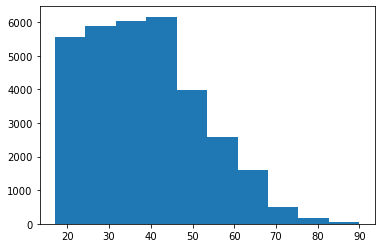

In [37]:
plt.hist(df['Age'])
plt.show()

Majority of the people ages between 25-40.

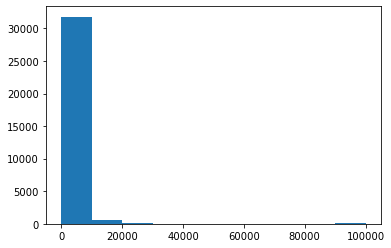

In [38]:
plt.hist(df['Capital_gain'])
plt.show()

Capital gain is 0 for most of the people.

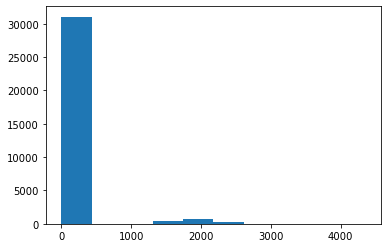

In [39]:
plt.hist(df['Capital_loss'])
plt.show()

Capital loss is also 0 for most of the people.

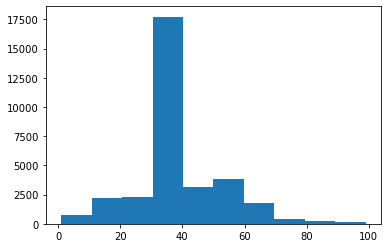

In [40]:
plt.hist(df['Hours_per_week'])
plt.show()

Most of the people 40 hours per week.

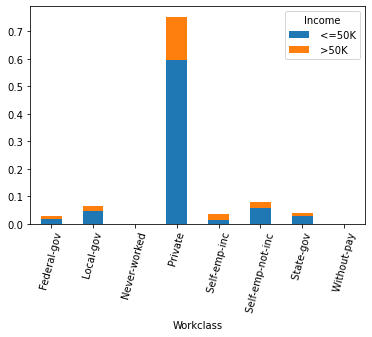

In [41]:
ct = pd.crosstab(df.Workclass, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Most of the people in all the workclass earns less than or equal to 50k. People who are selp employ have high chances of earning >50k

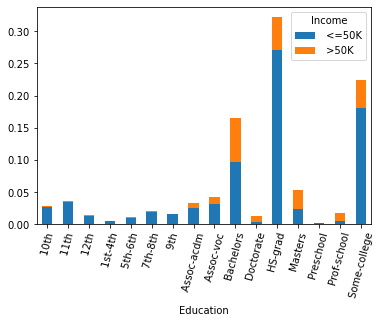

In [42]:
ct = pd.crosstab(df.Education, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Doctrorate and Prof School education has high chances of earning >50k income. Lower education will mostly gives <=50k earning.

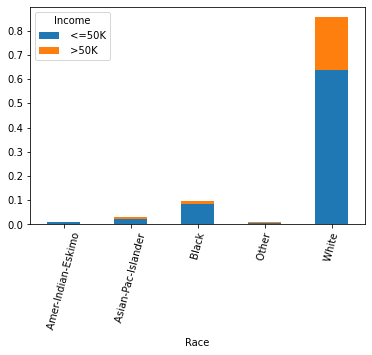

In [43]:
ct = pd.crosstab(df.Race, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

White people has more chance or earning more than 50k income.

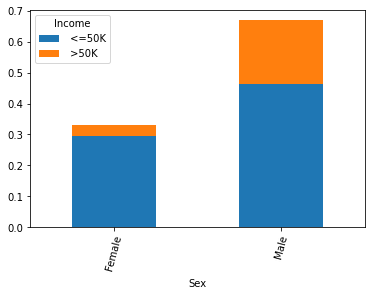

In [44]:
ct = pd.crosstab(df.Sex, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Male population is more likely to earn >50k income.

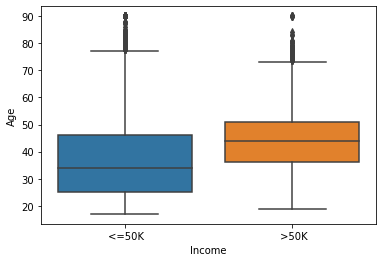

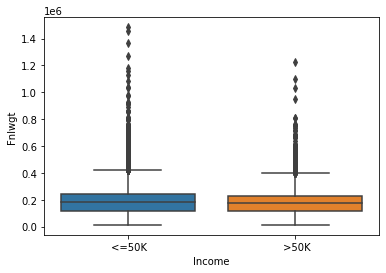

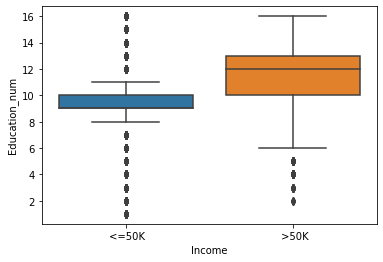

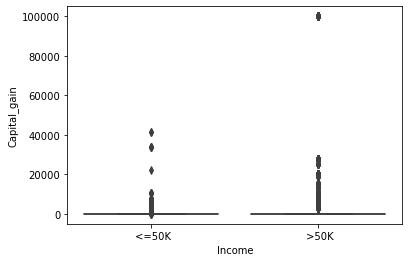

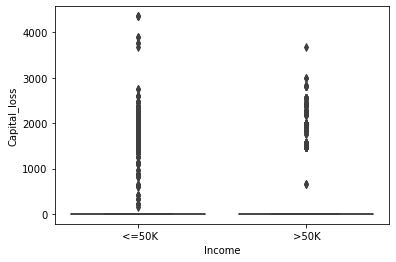

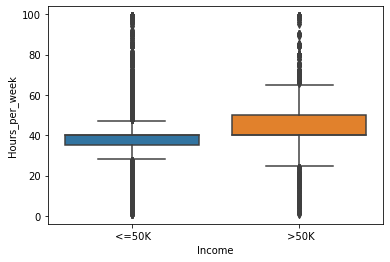

In [45]:
for i in df.columns:
    if df[i].dtypes==np.int64:
        sns.boxplot(x='Income',y=i,data=df)
        plt.show()

We can se that there are outliers prsent in Capital_gain and Capial_loss

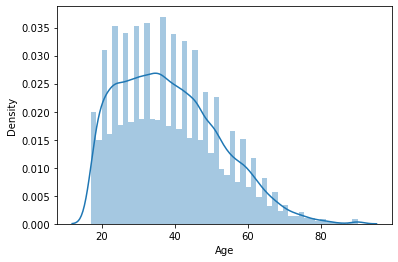

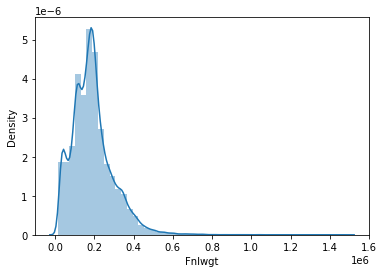

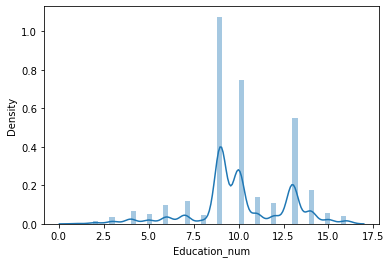

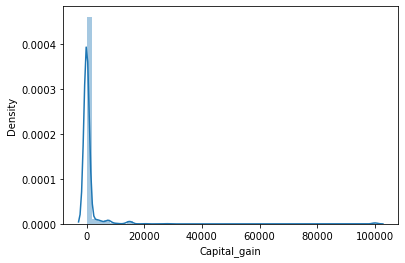

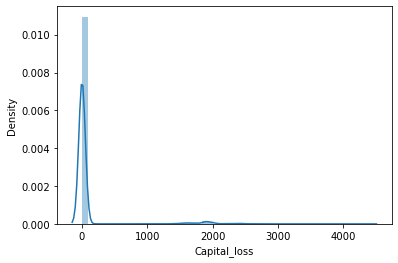

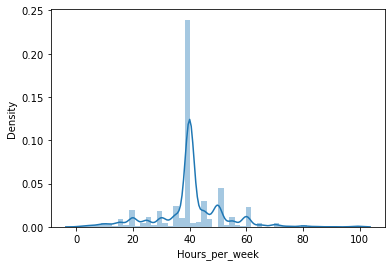

In [46]:
for i in df.columns:
    if df[i].dtypes==np.int64:
        sns.distplot(df[i])
        plt.show()

There is skewness and most of the data is right skewed.

<AxesSubplot:>

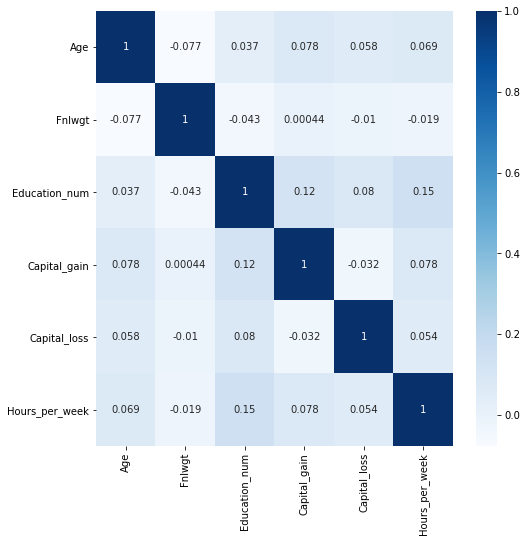

In [103]:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Most of the features are not corelated with each other.

In [47]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

We will use Power transform method to reduce the skew.

In [48]:
from sklearn.preprocessing import power_transform

We will copy our DataFrame and drop all the object column.

In [49]:
df_new=df.copy()
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [50]:
for i in df.columns:
    if df[i].dtypes==object:
        df.drop([i],axis=1,inplace=True)        

In [51]:
df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [52]:
df2=power_transform(df)
df2=pd.DataFrame(data=df2,columns=df.columns)
df2

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.891947,-1.089889,1.164793,-0.301370,-0.221213,-2.221515
1,0.102717,0.398743,-0.464330,-0.301370,-0.221213,-0.035570
2,1.064381,0.562540,-1.200274,-0.301370,-0.221213,-0.035570
3,-0.731663,1.340398,1.164793,-0.301370,-0.221213,-0.035570
4,0.028023,0.957182,1.600809,-0.301370,-0.221213,-0.035570
...,...,...,...,...,...,...
32555,-0.827983,0.746749,0.739697,-0.301370,-0.221213,-0.197550
32556,0.247374,-0.193298,-0.464330,-0.301370,-0.221213,-0.035570
32557,1.334556,-0.219755,-0.464330,-0.301370,-0.221213,-0.035570
32558,-1.358341,0.271668,-0.464330,-0.301370,-0.221213,-1.654992


In [53]:
df2.skew()

Age              -0.013897
Fnlwgt            0.016914
Education_num     0.023885
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
dtype: float64

There is still very high skew in capital gain and loss but this is the best we can do on this data.

Skewness is removed, now lets add the column back from the copy we have created

In [54]:
df2['Education']=df_new['Education']
df2['Marital_status']=df_new['Marital_status']
df2['Sex']=df_new['Sex']
df2['Occupation']=df_new['Occupation']
df2['Relationship']=df_new['Relationship']
df2['Race']=df_new['Race']
df2['Native_country']=df_new['Native_country']
df2['Income']=df_new['Income']
df2['Workclass']=df_new['Workclass']

In [55]:
df2

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Education,Marital_status,Sex,Occupation,Relationship,Race,Native_country,Income,Workclass
0,0.891947,-1.089889,1.164793,-0.301370,-0.221213,-2.221515,Bachelors,Married-civ-spouse,Male,Exec-managerial,Husband,White,United-States,<=50K,Self-emp-not-inc
1,0.102717,0.398743,-0.464330,-0.301370,-0.221213,-0.035570,HS-grad,Divorced,Male,Handlers-cleaners,Not-in-family,White,United-States,<=50K,Private
2,1.064381,0.562540,-1.200274,-0.301370,-0.221213,-0.035570,11th,Married-civ-spouse,Male,Handlers-cleaners,Husband,Black,United-States,<=50K,Private
3,-0.731663,1.340398,1.164793,-0.301370,-0.221213,-0.035570,Bachelors,Married-civ-spouse,Female,Prof-specialty,Wife,Black,Cuba,<=50K,Private
4,0.028023,0.957182,1.600809,-0.301370,-0.221213,-0.035570,Masters,Married-civ-spouse,Female,Exec-managerial,Wife,White,United-States,<=50K,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.746749,0.739697,-0.301370,-0.221213,-0.197550,Assoc-acdm,Married-civ-spouse,Female,Tech-support,Wife,White,United-States,<=50K,Private
32556,0.247374,-0.193298,-0.464330,-0.301370,-0.221213,-0.035570,HS-grad,Married-civ-spouse,Male,Machine-op-inspct,Husband,White,United-States,>50K,Private
32557,1.334556,-0.219755,-0.464330,-0.301370,-0.221213,-0.035570,HS-grad,Widowed,Female,Adm-clerical,Unmarried,White,United-States,<=50K,Private
32558,-1.358341,0.271668,-0.464330,-0.301370,-0.221213,-1.654992,HS-grad,Never-married,Male,Adm-clerical,Own-child,White,United-States,<=50K,Private


In [56]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

Now we will change the categorical data using LabelEncoder

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [58]:
for i in df2.columns:
    if df2[i].dtypes==object:
        df2[i]=le.fit_transform(df2[i])

In [59]:
df2

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Education,Marital_status,Sex,Occupation,Relationship,Race,Native_country,Income,Workclass
0,0.891947,-1.089889,1.164793,-0.301370,-0.221213,-2.221515,9,2,1,3,0,4,38,0,5
1,0.102717,0.398743,-0.464330,-0.301370,-0.221213,-0.035570,11,0,1,5,1,4,38,0,3
2,1.064381,0.562540,-1.200274,-0.301370,-0.221213,-0.035570,1,2,1,5,0,2,38,0,3
3,-0.731663,1.340398,1.164793,-0.301370,-0.221213,-0.035570,9,2,0,9,5,2,4,0,3
4,0.028023,0.957182,1.600809,-0.301370,-0.221213,-0.035570,12,2,0,3,5,4,38,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.746749,0.739697,-0.301370,-0.221213,-0.197550,7,2,0,12,5,4,38,0,3
32556,0.247374,-0.193298,-0.464330,-0.301370,-0.221213,-0.035570,11,2,1,6,0,4,38,1,3
32557,1.334556,-0.219755,-0.464330,-0.301370,-0.221213,-0.035570,11,6,0,0,4,4,38,0,3
32558,-1.358341,0.271668,-0.464330,-0.301370,-0.221213,-1.654992,11,4,1,0,3,4,38,0,3


In [60]:
df2.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

Our target variable has been changed from Income <=50k to 0 and  >50k to 1

Education and Education_num are the same columns. One was object type and other was numerical giving the status of one's education.
Hence we will drop the columns education_num

In [61]:
df2.drop(['Education_num'],axis=1,inplace=True)

In [62]:
df2

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Education,Marital_status,Sex,Occupation,Relationship,Race,Native_country,Income,Workclass
0,0.891947,-1.089889,-0.301370,-0.221213,-2.221515,9,2,1,3,0,4,38,0,5
1,0.102717,0.398743,-0.301370,-0.221213,-0.035570,11,0,1,5,1,4,38,0,3
2,1.064381,0.562540,-0.301370,-0.221213,-0.035570,1,2,1,5,0,2,38,0,3
3,-0.731663,1.340398,-0.301370,-0.221213,-0.035570,9,2,0,9,5,2,4,0,3
4,0.028023,0.957182,-0.301370,-0.221213,-0.035570,12,2,0,3,5,4,38,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.746749,-0.301370,-0.221213,-0.197550,7,2,0,12,5,4,38,0,3
32556,0.247374,-0.193298,-0.301370,-0.221213,-0.035570,11,2,1,6,0,4,38,1,3
32557,1.334556,-0.219755,-0.301370,-0.221213,-0.035570,11,6,0,0,4,4,38,0,3
32558,-1.358341,0.271668,-0.301370,-0.221213,-1.654992,11,4,1,0,3,4,38,0,3


Let see if we can remove some outliers

In [63]:
from scipy.stats import zscore

In [64]:
z=np.abs(zscore(df2.drop(columns=['Income'])))
z

array([[0.89194656, 1.08988899, 0.30136989, ..., 0.39367451, 0.26137428,
        1.72133587],
       [0.10271741, 0.39874263, 0.30136989, ..., 0.39367451, 0.26137428,
        0.08522344],
       [1.06438077, 0.56254016, 0.30136989, ..., 1.96258321, 0.26137428,
        0.08522344],
       ...,
       [1.33455599, 0.2197547 , 0.30136989, ..., 0.39367451, 0.26137428,
        0.08522344],
       [1.35834147, 0.27166793, 0.30136989, ..., 0.39367451, 0.26137428,
        0.08522344],
       [1.00782289, 0.98216482, 3.31823374, ..., 0.39367451, 0.26137428,
        0.81805622]])

In [65]:
print('shape before removing the outliers:', df2.shape)
 
dfnew=df2[(z<3).all(axis=1)]
 
print('shape after removing the outliers:', dfnew.shape)

shape before removing the outliers: (32560, 14)
shape after removing the outliers: (25900, 14)


In [66]:
100-((25900/32560)*100)

20.454545454545453

We are losing huge amount of data hence we will not remove the outliers.

Since or data is imbalance we will now balance it using undersampling from NearMiss.

But before that we will split the data into input and target variable.

In [67]:
x=df2.drop(['Income'],axis=1)
y=df2['Income']
y=pd.DataFrame(data=y)

In [68]:
x

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Education,Marital_status,Sex,Occupation,Relationship,Race,Native_country,Workclass
0,0.891947,-1.089889,-0.301370,-0.221213,-2.221515,9,2,1,3,0,4,38,5
1,0.102717,0.398743,-0.301370,-0.221213,-0.035570,11,0,1,5,1,4,38,3
2,1.064381,0.562540,-0.301370,-0.221213,-0.035570,1,2,1,5,0,2,38,3
3,-0.731663,1.340398,-0.301370,-0.221213,-0.035570,9,2,0,9,5,2,4,3
4,0.028023,0.957182,-0.301370,-0.221213,-0.035570,12,2,0,3,5,4,38,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.746749,-0.301370,-0.221213,-0.197550,7,2,0,12,5,4,38,3
32556,0.247374,-0.193298,-0.301370,-0.221213,-0.035570,11,2,1,6,0,4,38,3
32557,1.334556,-0.219755,-0.301370,-0.221213,-0.035570,11,6,0,0,4,4,38,3
32558,-1.358341,0.271668,-0.301370,-0.221213,-1.654992,11,4,1,0,3,4,38,3


In [69]:
y

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [70]:
y.shape

(32560, 1)

Import the NearMiss library for under sampling the data.

In [71]:
from imblearn.under_sampling import NearMiss

In [72]:
NR=NearMiss()
X,Y=NR.fit_resample(x,y)
y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

In [73]:
y_new.value_counts()

Income
1         7841
0         7841
dtype: int64

We can see that the class is now balance.

In [74]:
print(x_new.shape)
print(y_new.shape)


(15682, 13)
(15682, 1)


We will bring our data to the standard scale using Standard Scaler

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)

In [76]:
sc_x

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Education,Marital_status,Sex,Occupation,Relationship,Race,Native_country,Workclass
0,0.493219,0.304481,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
1,0.159972,-0.116693,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
2,0.245612,0.040621,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
3,0.245612,0.128600,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
4,0.159972,-0.067491,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,2.106670,1.073940,-0.382112,-0.2528,-3.345644,-0.264034,-0.131087,0.430195,0.682485,-0.469672,0.249474,0.165679,-0.110795
15678,-0.199947,-0.710168,-0.382112,-0.2528,-2.365592,-1.276319,-0.131087,-2.324528,-1.573359,3.048383,0.249474,0.165679,-1.903862
15679,0.951525,1.339044,-0.382112,-0.2528,-0.404371,0.410823,-0.131087,0.430195,-0.821411,-0.469672,0.249474,0.165679,-0.110795
15680,-0.107209,-0.175107,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-0.069463,-0.469672,0.249474,0.165679,-0.110795


Our data is now on common scale. I am reassigning x to the sc_x and y to y_new

In [77]:
y=y_new
x=sc_x
x

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Education,Marital_status,Sex,Occupation,Relationship,Race,Native_country,Workclass
0,0.493219,0.304481,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
1,0.159972,-0.116693,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
2,0.245612,0.040621,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
3,0.245612,0.128600,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
4,0.159972,-0.067491,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-1.072061,-0.469672,0.249474,0.165679,-0.110795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,2.106670,1.073940,-0.382112,-0.2528,-3.345644,-0.264034,-0.131087,0.430195,0.682485,-0.469672,0.249474,0.165679,-0.110795
15678,-0.199947,-0.710168,-0.382112,-0.2528,-2.365592,-1.276319,-0.131087,-2.324528,-1.573359,3.048383,0.249474,0.165679,-1.903862
15679,0.951525,1.339044,-0.382112,-0.2528,-0.404371,0.410823,-0.131087,0.430195,-0.821411,-0.469672,0.249474,0.165679,-0.110795
15680,-0.107209,-0.175107,-0.382112,-0.2528,-0.404371,0.073394,-0.131087,0.430195,-0.069463,-0.469672,0.249474,0.165679,-0.110795


In [78]:
y

,Income
0,0
1,0
2,0
3,0
4,0
...,...
15677,1
15678,1
15679,1
15680,1


### Model Fitting and Selection

Importing all the libraries for model fitting, cross validation and ROC AUC curve

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.6824992030602487  on Random state 96


#### We can see that the best random state is 96. We will split the data with this random state

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=96)

In [82]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.6824992030602487
[[1241  353]
 [ 643  900]]
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1594
           1       0.72      0.58      0.64      1543

    accuracy                           0.68      3137
   macro avg       0.69      0.68      0.68      3137
weighted avg       0.69      0.68      0.68      3137

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.7194772075231113
[[1245  349]
 [ 531 1012]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1594
           1       0.74      0.66      0.70      1543

    accuracy                           0.72      3137
   macro avg       0.72      0.72      0.72      3137
weighted avg       0.72      0.72      0.72      3137

-----------------------------------------------------------------------------------

##### AdaBoostClassifier has given us the best test accuracy of 76%

### Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [83]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.6550790678081879
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.6307946261864644
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.632903528003487
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.6717375278928913
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.6276059726568345
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.6571841272371237
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7333263330037146
-------------------------------------------------------------------------------


##### AdaBoostClassifier has the least difference between test and CV score. We are getting the Cross validation score of 73%

We will check the ROC_AUC score to pick the final model

### ROC_AUC score

AUC Score of LogisticRegression()
0.6809119340104783




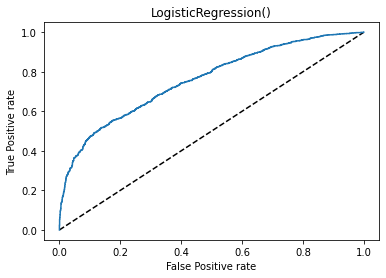



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.7184595749940437




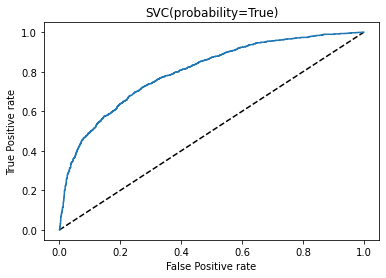



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.7054276771854272




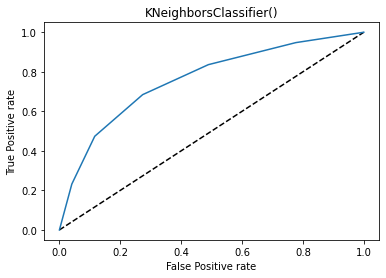



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.738140678223832




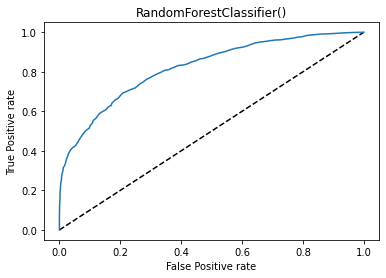



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.6604294620705806




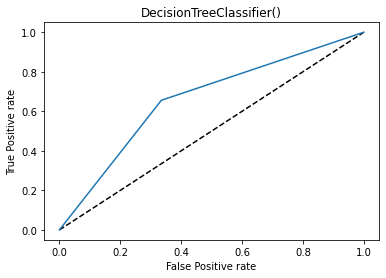



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.6709887450590395




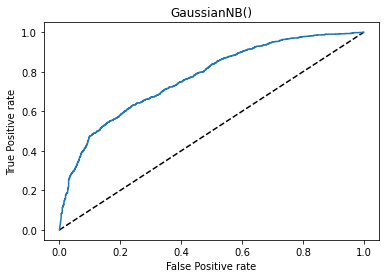



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.768170659415452




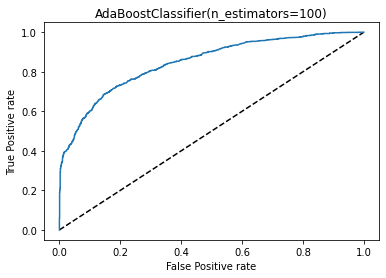



------------------------------------------------------------------------


In [84]:
auc=[]
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

##### Lets see all our model performance.

In [85]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.682499,0.655079,0.680912
1,SVC,0.719477,0.630795,0.718460
2,KNeighborsClassifier,0.705770,0.632904,0.705428
3,RandomForestClassifier,0.738604,0.671738,0.738141
4,DecisionTreeClassifier,0.660504,0.627606,0.660429
5,GaussianNB,0.674849,0.657184,0.670989
6,AdaBoostClassifier,0.769206,0.733326,0.768171


##### We can conclude the AdaBoostClassifier is working best with 76% test accuracy, 73% cross validation and 76% of ROC_AUC score.

### HyperTuning of the model

We will import GridSearch to hypertune the model

In [86]:
from sklearn.model_selection import GridSearchCV

We will hypertune ADC model.

Searching the best parameters for ADC to fit the model and improve the accuracy


Lets check the base parameters of the model

In [100]:
adc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [89]:
parameters={'n_estimators':[50,100,200],'learning_rate':[0.001,0.01,0.1,0.2,0.5],'algorithm':['SAMME','SAMME.R']}
GCV=GridSearchCV(adc,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [50, 100, 200]})

Let's check the best parameters

In [90]:
GCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200}

AdaBoostClassifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 76.21931781957284
Cross Validation Score 73.17326364718664
AUC ROC Score 76.11764710665643


AUC ROC Curve with Final Mod


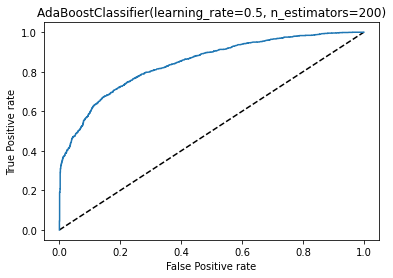

In [98]:
Finalmod=AdaBoostClassifier(base_estimator=None,n_estimators=200,learning_rate=0.5,algorithm='SAMME.R',random_state=None)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)

cvs=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))

print('AdaBoostClassifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc*100)
print('Cross Validation Score',cvs.mean()*100)
print('AUC ROC Score',auc_score*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

##### Accuracy of 76% with Cross val score of 73% and AUC_ROC score of 76%

There is not much difference to the model performance after HyperTuning. We will save this as our Final Model.

In [101]:
import joblib
joblib.dump(Finalmod,'Census_Income.obj')

['Census_Income.obj']